In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


from mnist import mnist
from ldl.algorithms import *
from ldl.predictions import *
from ldl.network import Network
from ldl.utitlities import *
import numpy as np


In [10]:
x_train, t_train, x_test, t_test = mnist.load()

train_data = normalize_2d_array(x_train[:40000])
val_data = normalize_2d_array(x_train[40001:])
test_data = normalize_2d_array(x_test)

train_labels = t_train[:40000]
val_labels = t_train[40001:]
test_labels = t_test

# Convert labels to targets for output neurons
train_targets = np.zeros([train_labels.shape[0], 10])
for index, label in enumerate(train_labels):
    train_targets[index, label] = 1

val_targets = np.zeros([val_labels.shape[0], 10])
for index, label in enumerate(val_labels):
    val_targets[index, label] = 1
    
test_targets = np.zeros([test_labels.shape[0], 10])
for index, label in enumerate(test_labels):
    test_targets[index, label] = 1


### Unvectorized Relu Function
Notice how slowly this runs compared to the default vectorized version

In [16]:

def unvectorized_relu(weighted_input):
    '''
    A very slow and inefficient Relu function
    '''
    data = np.copy(weighted_input)
    num_rows = weighted_input.shape[0]
    num_columns = weighted_input.shape[1]
    
    for row in range(num_rows):
        for column in range(num_columns):
          data[row, column] = data[row, column] * data[row, column] > 0  
    return data

network = Network(weights=weights, biases=biases, name=name)

network.activation_fun = unvectorized_relu

Epoch: 1, 	Train cost: 4.50000, Val cost: 4.50000, Test cost: 4.50000, Test error: 90.200%
Epoch: 2, 	Train cost: 4.50000, Val cost: 4.50000, Test cost: 4.50000, Test error: 90.200%
Epoch: 3, 	Train cost: 4.50000, Val cost: 4.50000, Test cost: 4.50000, Test error: 90.200%
Epoch: 4, 	Train cost: 4.50000, Val cost: 4.50000, Test cost: 4.50000, Test error: 90.200%
Epoch: 5, 	Train cost: 4.50000, Val cost: 4.50000, Test cost: 4.50000, Test error: 90.200%
Epoch: 6, 	Train cost: 4.50000, Val cost: 4.50000, Test cost: 4.50000, Test error: 90.200%
Epoch: 7, 	Train cost: 4.50000, Val cost: 4.50000, Test cost: 4.50000, Test error: 90.200%
Epoch: 8, 	Train cost: 4.50000, Val cost: 4.50000, Test cost: 4.50000, Test error: 90.200%
Epoch: 9, 	Train cost: 4.50000, Val cost: 4.50000, Test cost: 4.50000, Test error: 90.200%
Epoch: 10, 	Train cost: 4.50000, Val cost: 4.50000, Test cost: 4.50000, Test error: 90.200%
Unvectorized activation function ran 10 Epochs in 99.12315011024475 seconds


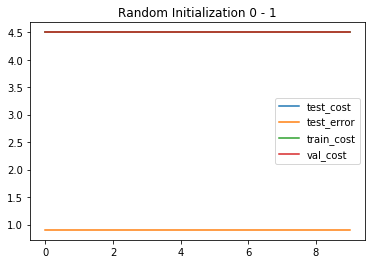

In [20]:
import time

shape = [784, 100, 10]

biases = get_relu_biases(shape)
weights = get_relu_weights(shape)
epochs=10

learning_rate = 0.03
name = 'Random Initialization 0 - 1'

network = Network(weights=weights, biases=biases, name=name)

network.activation_fun = unvectorized_relu

start = time.time()
results = network.train_and_validate(epochs, train_data, train_targets, val_data, val_targets, test_data, test_targets, test_labels, learning_rate)
end = time.time()
total_time = end - start
print(f'Unvectorized activation function ran {epochs} Epochs in {total_time} seconds')


### Default vectorized activation function

Epoch: 1, 	Train cost: 1.14722, Val cost: 0.60859, Test cost: 0.60836, Test error: 91.420%
Epoch: 2, 	Train cost: 0.60904, Val cost: 0.55570, Test cost: 0.55488, Test error: 89.720%
Epoch: 3, 	Train cost: 0.55582, Val cost: 0.53068, Test cost: 0.52969, Test error: 88.390%
Epoch: 4, 	Train cost: 0.53073, Val cost: 0.51528, Test cost: 0.51418, Test error: 87.010%
Epoch: 5, 	Train cost: 0.51529, Val cost: 0.50441, Test cost: 0.50330, Test error: 85.760%
Epoch: 6, 	Train cost: 0.50441, Val cost: 0.49602, Test cost: 0.49498, Test error: 84.750%
Epoch: 7, 	Train cost: 0.49608, Val cost: 0.48922, Test cost: 0.48823, Test error: 83.440%
Epoch: 8, 	Train cost: 0.48936, Val cost: 0.48351, Test cost: 0.48255, Test error: 82.320%
Epoch: 9, 	Train cost: 0.48373, Val cost: 0.47856, Test cost: 0.47769, Test error: 81.430%
Epoch: 10, 	Train cost: 0.47889, Val cost: 0.47419, Test cost: 0.47340, Test error: 80.730%
Vectorized activation function ran 10 Epochs in 7.146703720092773 seconds


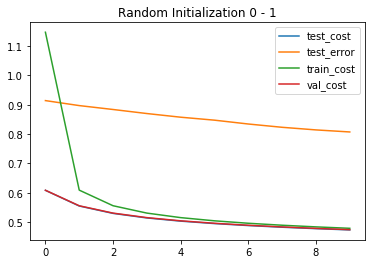

In [21]:
import time

shape = [784, 100, 10]

biases = get_relu_biases(shape)
weights = get_relu_weights(shape)
epochs=10

learning_rate = 0.03
name = 'Random Initialization 0 - 1'

network = Network(weights=weights, biases=biases, name=name)

start = time.time()
results = network.train_and_validate(epochs, train_data, train_targets, val_data, val_targets, test_data, test_targets, test_labels, learning_rate)
end = time.time()
total_time = end - start
print(f'Vectorized activation function ran {epochs} Epochs in {total_time} seconds')
